##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import pandas as pd
import sys
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import openpyxl
import copy as c
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn import metrics    
from sklearn import tree
import io
import pydot
from IPython.core.display import Image
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system   
import graphviz
from sklearn.naive_bayes import MultinomialNB
from os import system                
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Perceptron
import statsmodels.api as sm 
system("pip install graphviz")
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\' 
from matplotlib.colors import ListedColormap

In [2]:
train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

print(train_data['sentiment'].unique())
print(train_data.columns)

['neutral' 'positive' 'negative']
Index(['Unnamed: 0', 'id', 'text', 'sentiment'], dtype='object')


### Pie chart

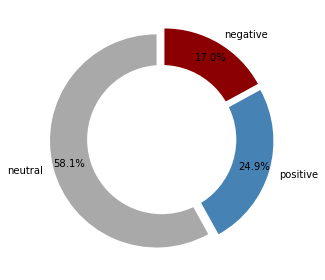

In [3]:
labels = ['neutral', 'positive', 'negative']
sizes = list(train_data['sentiment'].value_counts())
#colors
colors = ['#a9a9a9','#4682b4','#8b0000']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

Then we separate the tweet text and the label (sentiment). 

In [4]:
#separating instance and label for Train
X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

#check the result
print("Train length:",len(X_train_raw))

#separating instance and label for Test
X_test_raw = [x[0] for x in test_data[['text']].values]

#check the result
print("Test length:",len(X_test_raw))

Train length: 21802
Test length: 6099


In [5]:
#Let's see one example tweet
print(X_train_raw[1])
print(X_test_raw[1])

 is anybody going to the radio station tomorrow to see shawn? me and my friend may go but we would like to make new friends/meet there (:	
 if putin wanted to intervene all he would have had to do is donate to the clinton foundation. not hack computers &‚ä¶ https://t.co/2wuck3zowg


### Emoji Preprocessing

In [6]:
emotion = pd.read_excel("emotion.xlsx")
emotion.head()

emotion = emotion.drop_duplicates()
emotion

,emoticon,word
0,(:,smile
1,:),smile
2,(-:,smile
3,:-),smile
4,o-:,surprise
5,:-o,surprise
6,:o,surprise
7,o:,surprise
8,;-),wink
9,;),wink


In [8]:
# function transforming emoji to appropriate word that emoji means
def change_emotions(x):
    x = re.sub("\"","",x)
    try:
        e = emotion[emotion["emoticon"] == x]["word"].values[0]
        return(e)
    except :
        return(x)
    
def change_all_emotions(x):
    tokenizer1 = RegexpTokenizer("[\s]+", gaps=True)
    tmp = tokenizer1.tokenize(x)
    return list(map(change_emotions,tmp))

change_all_emotions(X_train_raw[1])

['is',
 'anybody',
 'going',
 'to',
 'the',
 'radio',
 'station',
 'tomorrow',
 'to',
 'see',
 'shawn?',
 'me',
 'and',
 'my',
 'friend',
 'may',
 'go',
 'but',
 'we',
 'would',
 'like',
 'to',
 'make',
 'new',
 'friends/meet',
 'there',
 'smile']

### Preprocessing

In [9]:
X_train_raw = list(map(change_all_emotions, X_train_raw))
X_test_raw = list(map(change_all_emotions, X_test_raw))

In [10]:
# \+: recognizing the case of more than one letter or number.
tokenizer2 = RegexpTokenizer("[\w]+")

def preprocessing(x):
    tmp = [i for i in x if i[:4] != 'http']
    tmp = tokenizer2.tokenize(" ".join(tmp))
    #alphabet lower
    tokens = [w.lower() for w in tmp]
    # remove ramaining tokens that are alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    return " ".join(tokens)

In [11]:
from nltk.corpus import stopwords
import re
def data_cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return tweet


stop_words = stopwords.words('english')

In [12]:
X_train_raw_remove = list(map(preprocessing, X_train_raw))
X_test_raw_remove = list(map(preprocessing, X_test_raw))

In [13]:
X_train_raw_remove = list(map(data_cleaner, X_train_raw_remove))
X_test_raw_remove = list(map(data_cleaner, X_test_raw_remove))

In [14]:
# https://pythonspot.com/nltk-speech-tagging/

n=WordNetLemmatizer()

def clean_dt_with_postag(data):
    tmp = tokenizer2.tokenize(data)
    pt = pos_tag(tmp)
    # select 'V','J','N','R' only
    pt = [i for i in pt if i[1][0] in ["V","J","N","R"]]
    f = lambda x : n.lemmatize(x[0],'v') if (x[1][0] == "V" ) or (x[1] == 'RB') else n.lemmatize(x[0]) 
    res = list(map(f,pt))
    
    
    return(" ".join(res))

In [15]:
X_train_raw_clean = list(map(clean_dt_with_postag, X_train_raw_remove))
X_test_raw_clean = list(map(clean_dt_with_postag, X_test_raw_remove))

In [16]:
#Let's see one example tweet
X_train_raw_clean[1]

'anybody go radio station tomorrow see shawn friend go like make new friend meet smile'

### modelling

In [17]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

# Making the model 
sentences_m = X_train_raw_clean
y_m = np.array(train_data["sentiment"])
sentences_train_m, sentences_test_m, y_train_m, y_test_m = train_test_split(sentences_m, y_m,
                                                                    test_size = 0.1,stratify = y_m,
                                                                    random_state=1000)
# XGB labelling (words to number)
y_train_m_xgb = np.where(y_train_m == "neutral",1,
                    np.where(y_train_m == "negative",0,2))
y_test_m_xgb = np.where(y_test_m == "neutral",1,
                    np.where(y_test_m == "negative",0,2))
                     

In [18]:
BoW_vectorizer = CountVectorizer()

#Build the feature set (vocabulary) and vectorise the Train dataset using BoW
X_train_BoW = BoW_vectorizer.fit_transform(sentences_train_m)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_BoW = BoW_vectorizer.transform(sentences_test_m)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf = tfidf_vectorizer.fit_transform(sentences_train_m)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf = tfidf_vectorizer.transform(sentences_test_m)

In [20]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

### for test data

In [21]:
y_train_F = np.array(train_data["sentiment"])
y_train_F_xgb = np.where(y_train_F == "neutral",1,
                    np.where(y_train_F == "negative",0,2))

In [22]:
BoW_vectorizer = CountVectorizer()

#Build the feature set (vocabulary) and vectorise the Train dataset using BoW
X_train_BoW_F = BoW_vectorizer.fit_transform(X_train_raw_clean)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_BoW_F = BoW_vectorizer.transform(X_test_raw_clean)

In [23]:
tfidf_vectorizer = TfidfVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf_F = tfidf_vectorizer.fit_transform(X_train_raw_clean)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf_F = tfidf_vectorizer.transform(X_test_raw_clean)

In [24]:
tfidf_vectorizer = TfidfVectorizer(min_df = 2,analyzer = 'word', sublinear_tf = True, ngram_range = (1, 3),max_features = 1000)

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf_F = tfidf_vectorizer.fit_transform(X_train_raw_clean)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf_F = tfidf_vectorizer.transform(X_test_raw_clean)

# Extreme Gradient Boosting(Xgboost)

### < BOW >

#### 1. split Train

In [25]:
from xgboost import XGBClassifier

[20:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train dataset Accuracy: 0.6644
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       372
           1       0.68      0.85      0.75      1266
           2       0.66      0.46      0.54       543

    accuracy                           0.66      2181
   macro avg       0.64      0.55      0.57      2181
weighted avg       0.66      0.66      0.64      2181

[[ 127  227   18]
 [  81 1073  112]
 [  10  284  249]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

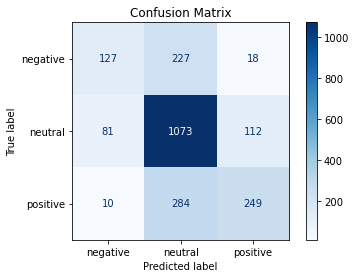

In [26]:
# make model
model=XGBClassifier(booster='dart', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=500, 
                    nthread=4, 
                    #multi:softmax / multi:softprob
                    objective='multi:softmax', 
                    random_state=2, 
                    silent= True)


xgb_model = model.fit(X_train_BoW, y_train_m_xgb)

# predict
xgb_pred = xgb_model.predict(X_test_BoW)


print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m_xgb,xgb_pred)))
print(metrics.classification_report(y_test_m_xgb , xgb_pred))
print(metrics.confusion_matrix(y_test_m_xgb , xgb_pred))

labels = ['negative','neutral','positive']

# Confusion matrix 
plot = plot_confusion_matrix(xgb_model, # classifier model
                             X_test_BoW, y_test_m_xgb, #  predicted data, answer of predicted value
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             display_labels = labels,
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2. full Train

In [27]:
# make model
XGB=XGBClassifier(booster='dart', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=500, 
                    nthread=4, 
                    objective='multi:softmax', 
                    random_state=2, 
                    silent= True)
XGB.fit(X_train_BoW_F, y_train_F_xgb)

XGB_pred_Full_BoW = XGB.predict(X_train_BoW_F)
print('Train dataset Accuracy: {0:.4f}'.format(accuracy_score(y_train_F_xgb,XGB_pred_Full_BoW)))
print(metrics.classification_report(y_train_F_xgb , XGB_pred_Full_BoW))
print(metrics.confusion_matrix(y_train_F_xgb , XGB_pred_Full_BoW))

xgb_pred = XGB.predict(X_test_BoW_F)

test_data["sentiment"] = xgb_pred
test_data_final = test_data[['id','sentiment']]
test_data_final['sentiment'] = np.where(test_data_final['sentiment'] == 0, "neutral",
                                        np.where(test_data_final['sentiment'] == 1, "negative","positive"))
test_data_final.to_csv("test_data_final_XGB_BOW_dart.csv",index = None)

[20:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train dataset Accuracy: 0.7912
              precision    recall  f1-score   support

           0       0.85      0.55      0.66      3715
           1       0.77      0.93      0.84     12659
           2       0.85      0.63      0.72      5428

    accuracy                           0.79     21802
   macro avg       0.82      0.70      0.74     21802
weighted avg       0.80      0.79      0.78     21802

[[ 2031  1590    94]
 [  319 11824   516]
 [   49  1984  3395]]


C:\Users\tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### < TF-IDF >

#### 1. split Train

[21:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train dataset Accuracy: 0.6584
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       372
           1       0.68      0.84      0.75      1266
           2       0.62      0.46      0.53       543

    accuracy                           0.66      2181
   macro avg       0.63      0.55      0.57      2181
weighted avg       0.65      0.66      0.64      2181

[[ 125  225   22]
 [  74 1060  132]
 [  15  277  251]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

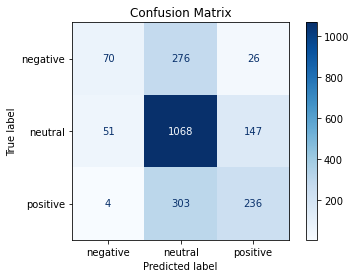

In [28]:
# make model
model=XGBClassifier(booster='dart', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=500, 
                    nthread=4, 
                    #multi:softmax / multi:softprob
                    objective='multi:softmax', 
                    random_state=2, 
                    silent= True)


xgb_model = model.fit(X_train_tfidf, y_train_m_xgb)

# predict
xgb_pred = xgb_model.predict(X_test_tfidf)


print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m_xgb,xgb_pred)))
print(metrics.classification_report(y_test_m_xgb , xgb_pred))
print(metrics.confusion_matrix(y_test_m_xgb , xgb_pred))

# Confusion matrix 
plot = plot_confusion_matrix(xgb_model, # classifier model
                             X_test_BoW, y_test_m_xgb, #  predicted data, answer of predicted value
                             display_labels = labels,
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2. full Train

In [29]:
# make model
XGB=XGBClassifier(booster='dart', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=500, 
                    nthread=4, 
                    objective='multi:softmax', 
                    random_state=2, 
                    silent= True)

XGB.fit(X_train_tfidf_F, y_train_F_xgb)

XGB_pred_Full_tfidf = XGB.predict(X_train_tfidf_F)
print('Train dataset Accuracy: {0:.4f}'.format(accuracy_score(y_train_F_xgb,XGB_pred_Full_tfidf)))
print(metrics.classification_report(y_train_F_xgb , XGB_pred_Full_tfidf))
print(metrics.confusion_matrix(y_train_F_xgb , XGB_pred_Full_tfidf))

xgb_pred = XGB.predict(X_test_tfidf_F)

test_data["sentiment"] = xgb_pred
test_data_final = test_data[['id','sentiment']]
test_data_final['sentiment'] = np.where(test_data_final['sentiment'] == 0, "neutral",
                                        np.where(test_data_final['sentiment'] == 1, "negative","positive"))
test_data_final.to_csv("test_data_final_XGB_tfidf_dart.csv",index = None)

[21:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train dataset Accuracy: 0.8617
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      3715
           1       0.83      0.97      0.89     12659
           2       0.92      0.74      0.82      5428

    accuracy                           0.86     21802
   macro avg       0.90      0.79      0.83     21802
weighted avg       0.87      0.86      0.86     21802

[[ 2485  1142    88]
 [  144 12265   250]
 [   36  1355  4037]]


C:\Users\tommy\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Decision Tree

### < BOW >

#### 1. split Train

Train dataset Accuracy: 0.6071
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       372
     neutral       0.60      0.96      0.74      1266
    positive       0.64      0.19      0.29       543

    accuracy                           0.61      2181
   macro avg       0.42      0.38      0.35      2181
weighted avg       0.51      0.61      0.50      2181

[[   0  360   12]
 [   0 1221   45]
 [   0  440  103]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\util

Text(0.5, 1.0, 'Confusion Matrix')

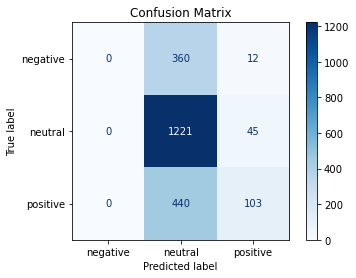

In [30]:
dtree = DecisionTreeClassifier()
### set parameters with dictionaty formation
parameters = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)
grid_dtree.fit(X_train_BoW, y_train_m)
dtree = grid_dtree.best_estimator_

DT_pred = dtree.predict(X_test_BoW)
print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m,DT_pred)))
print(metrics.classification_report(y_test_m , DT_pred))
print(metrics.confusion_matrix(y_test_m , DT_pred))

# Confusion matrix 
plot = plot_confusion_matrix(dtree, # classifier model
                             X_test_BoW, y_test_m, #  predicted data, answer of predicted value
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2.full Train

In [31]:
dtree = DecisionTreeClassifier()
parameters = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)
grid_dtree.fit(X_train_BoW_F, y_train_F)
dtree = grid_dtree.best_estimator_

DT_pred = dtree.predict(X_train_BoW_F)
print('Train dataset Accuracy: {0:.4f}'.format(accuracy_score(y_train_F,DT_pred)))
print(metrics.classification_report(y_train_F , DT_pred))
print(metrics.confusion_matrix(y_train_F , DT_pred))

DT_pred = dtree.predict(X_test_BoW_F)

test_data["sentiment"] = DT_pred
test_data_final = test_data[['id','sentiment']]
test_data_final.to_csv("test_data_final_DT_BOW.csv",index = None)

테스트 데이터 세트 정확도: 0.6109
              precision    recall  f1-score   support

    negative       0.90      0.00      0.00      3715
     neutral       0.61      0.95      0.74     12659
    positive       0.64      0.23      0.34      5428

    accuracy                           0.61     21802
   macro avg       0.71      0.39      0.36     21802
weighted avg       0.66      0.61      0.52     21802

[[    9  3587   119]
 [    1 12068   590]
 [    0  4187  1241]]


### < TF_IDF >

#### 1. split Train

Train dataset Accuracy: 0.6057
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       372
     neutral       0.60      0.96      0.74      1266
    positive       0.64      0.18      0.29       543

    accuracy                           0.61      2181
   macro avg       0.41      0.38      0.34      2181
weighted avg       0.51      0.61      0.50      2181

[[   0  360   12]
 [   0 1221   45]
 [   0  443  100]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\util

Text(0.5, 1.0, 'Confusion Matrix')

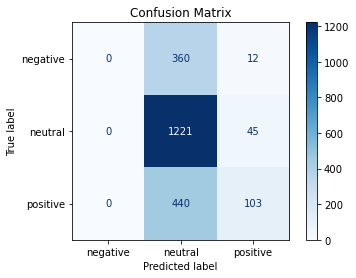

In [32]:
dtree = DecisionTreeClassifier()
parameters = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)
grid_dtree.fit(X_train_tfidf, y_train_m)
dtree = grid_dtree.best_estimator_

DT_pred = dtree.predict(X_test_tfidf)
print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m,DT_pred)))
print(metrics.classification_report(y_test_m , DT_pred))
print(metrics.confusion_matrix(y_test_m , DT_pred))


# Confusion matrix 
plot = plot_confusion_matrix(dtree, # classifier model
                             X_test_BoW, y_test_m, #  predicted data, answer of predicted value
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2.full Train

In [33]:
dtree = RandomForestClassifier()
parameters = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3]}


grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)
grid_dtree.fit(X_train_tfidf_F, y_train_F)
dtree = grid_dtree.best_estimator_

DT_pred = dtree.predict(X_train_tfidf_F)
print('Train dataset Accuracy: {0:.4f}'.format(accuracy_score(y_train_F,DT_pred)))
print(metrics.classification_report(y_train_F , DT_pred))
print(metrics.confusion_matrix(y_train_F , DT_pred))

DT_pred = dtree.predict(X_test_tfidf_F)

test_data["sentiment"] = DT_pred
test_data_final = test_data[['id','sentiment']]
test_data_final.to_csv("test_data_final_DT_TFIDF.csv",index = None)

Train dataset Accuracy: 0.5865


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      3715
     neutral       0.58      1.00      0.74     12659
    positive       0.79      0.03      0.06      5428

    accuracy                           0.59     21802
   macro avg       0.46      0.34      0.27     21802
weighted avg       0.54      0.59      0.44     21802

[[    0  3713     2]
 [    0 12615    44]
 [    0  5257   171]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

### < BOW >

#### 1. split Train

Train dataset Accuracy: 0.6676
              precision    recall  f1-score   support

    negative       0.61      0.35      0.45       372
     neutral       0.68      0.85      0.76      1266
    positive       0.65      0.45      0.53       543

    accuracy                           0.67      2181
   macro avg       0.65      0.55      0.58      2181
weighted avg       0.66      0.67      0.65      2181

[[ 132  224   16]
 [  70 1079  117]
 [  13  285  245]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

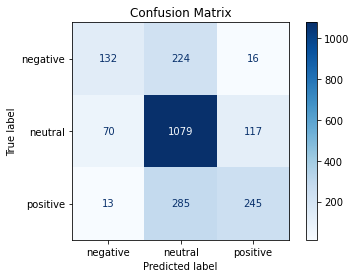

In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

svm = SVC(kernel='rbf')

grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, refit=True)
grid_svm.fit(X_train_BoW, y_train_m)

svm = grid_svm.best_estimator_

svm_pred = svm.predict(X_test_BoW)
print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m,svm_pred)))
print(metrics.classification_report(y_test_m , svm_pred))
print(metrics.confusion_matrix(y_test_m , svm_pred))

# Confusion matrix 
plot = plot_confusion_matrix(svm, # classifier model
                             X_test_BoW, y_test_m, #  predicted data, answer of predicted value
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2.full Train

In [35]:
svm = SVC(kernel='rbf')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, refit=True)

grid_svm.fit(X_train_BoW_F, y_train_F)

svm = grid_svm.best_estimator_

svm_pred = svm.predict(X_train_BoW_F)
print('Train dataset Accuracy: {0:.4f}'.format(accuracy_score(y_train_F,svm_pred)))
print(metrics.classification_report(y_train_F , svm_pred))
print(metrics.confusion_matrix(y_train_F , svm_pred))

svm_pred = svm.predict(X_test_BoW_F)

test_data["sentiment"] = svm_pred
test_data_final = test_data[['id','sentiment']]
test_data_final.to_csv("test_data_final_svm_BOW.csv",index = None)

Train dataset Accuracy: 0.8562
              precision    recall  f1-score   support

    negative       0.94      0.70      0.80      3715
     neutral       0.83      0.96      0.89     12659
    positive       0.90      0.72      0.80      5428

    accuracy                           0.86     21802
   macro avg       0.89      0.79      0.83     21802
weighted avg       0.86      0.86      0.85     21802

[[ 2604  1044    67]
 [  125 12172   362]
 [   43  1495  3890]]


### < TF_IDF >

#### 1. split Train

Train dataset Accuracy: 0.6547
              precision    recall  f1-score   support

    negative       0.55      0.40      0.46       372
     neutral       0.69      0.80      0.74      1266
    positive       0.61      0.50      0.55       543

    accuracy                           0.65      2181
   macro avg       0.62      0.56      0.58      2181
weighted avg       0.64      0.65      0.64      2181

[[ 148  204   20]
 [ 107 1008  151]
 [  15  256  272]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

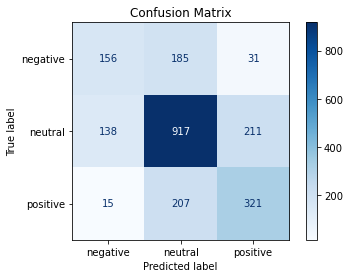

In [36]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }
svm = SVC(kernel='rbf')

grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, refit=True)
grid_svm.fit(X_train_tfidf, y_train_m)
svm = grid_svm.best_estimator_

svm_pred = svm.predict(X_test_tfidf)
print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m,svm_pred)))
print(metrics.classification_report(y_test_m , svm_pred))
print(metrics.confusion_matrix(y_test_m , svm_pred))

# Confusion matrix 
plot = plot_confusion_matrix(svm, # classifier model
                             X_test_BoW, y_test_m, #  predicted data, answer of predicted value
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2.full Train

In [37]:
svm = SVC(kernel='rbf')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

grid_svm = GridSearchCV(svm, param_grid=param_grid, cv=5, refit=True)
grid_svm.fit(X_train_tfidf_F, y_train_F)
svm = grid_svm.best_estimator_

svm_pred = svm.predict(X_train_tfidf_F)
print('Train dataset Accuracy: {0:.4f}'.format(accuracy_score(y_train_F,svm_pred)))
print(metrics.classification_report(y_train_F , svm_pred))
print(metrics.confusion_matrix(y_train_F , svm_pred))

svm_pred = svm.predict(X_test_tfidf_F)

test_data["sentiment"] = svm_pred
test_data_final = test_data[['id','sentiment']]
test_data_final.to_csv("test_data_final_svm_TFIDF.csv",index = None)

Train dataset Accuracy: 0.6994
              precision    recall  f1-score   support

    negative       0.71      0.29      0.41      3715
     neutral       0.69      0.92      0.79     12659
    positive       0.77      0.47      0.58      5428

    accuracy                           0.70     21802
   macro avg       0.72      0.56      0.59     21802
weighted avg       0.71      0.70      0.67     21802

[[ 1080  2517   118]
 [  372 11626   661]
 [   67  2818  2543]]


# Naive Bayes

### < BOW >

#### 1. split Train

Test dataset Accuracy: 0.6236
              precision    recall  f1-score   support

    negative       0.50      0.47      0.48       372
     neutral       0.70      0.69      0.69      1266
    positive       0.53      0.58      0.56       543

    accuracy                           0.62      2181
   macro avg       0.58      0.58      0.58      2181
weighted avg       0.63      0.62      0.62      2181

[[176 157  39]
 [162 869 235]
 [ 16 212 315]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

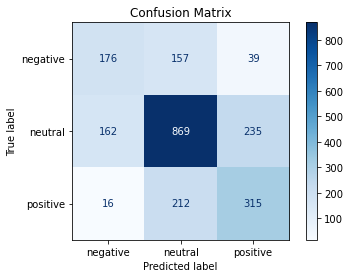

In [42]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB, GaussianNB
NB =  MultinomialNB()
parameters = {'alpha' : [0.5,0.1,0.01,0.001,0.00001]}
grid_NB = GridSearchCV(NB, param_grid=parameters, cv=5, refit=True)
grid_NB.fit(X_train_BoW, y_train_m)

NB = grid_NB.best_estimator_

NB_pred = NB.predict(X_test_BoW)
print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m,NB_pred)))
print(metrics.classification_report(y_test_m , NB_pred))
print(metrics.confusion_matrix(y_test_m , NB_pred))

# Confusion matrix 
plot = plot_confusion_matrix(NB, # classifier model
                             X_test_BoW, y_test_m, #  predicted data, answer of predicted value
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2.full Train

In [43]:
NB =  MultinomialNB(alpha = 0.5)

NB.fit(X_train_BoW_F, y_train_F)

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
NB_pred_Full_BoW = NB.predict(X_train_BoW_F)
print('Tain 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_train_F,NB_pred_Full_BoW)))
print(metrics.classification_report(y_train_F , NB_pred_Full_BoW))
print(metrics.confusion_matrix(y_train_F , NB_pred_Full_BoW))

NB_pred = NB.predict(X_test_BoW_F)

test_data["sentiment"] = NB_pred
test_data_final = test_data[['id','sentiment']]
test_data_final.to_csv("test_data_final_NB_BOW0_5.csv",index = None)

Tain 데이터 세트 정확도: 0.8050
              precision    recall  f1-score   support

    negative       0.72      0.76      0.74      3715
     neutral       0.87      0.81      0.84     12659
    positive       0.73      0.82      0.77      5428

    accuracy                           0.80     21802
   macro avg       0.77      0.80      0.78     21802
weighted avg       0.81      0.80      0.81     21802

[[ 2813   679   223]
 [  972 10292  1395]
 [  122   861  4445]]


### < TF_IDF >

#### 1. split Train

Test dataset Accuracy: 0.6268
              precision    recall  f1-score   support

    negative       0.54      0.27      0.36       372
     neutral       0.64      0.84      0.73      1266
    positive       0.60      0.38      0.46       543

    accuracy                           0.63      2181
   macro avg       0.59      0.50      0.52      2181
weighted avg       0.61      0.63      0.60      2181

[[ 102  257   13]
 [  81 1060  125]
 [   5  333  205]]


C:\Users\tommy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

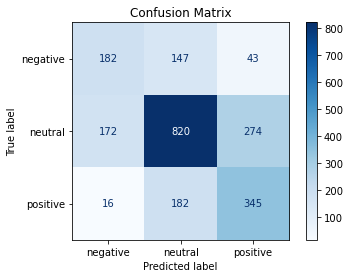

In [44]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB, GaussianNB
NB =  MultinomialNB()
parameters = {'alpha' : [0.1,0.01,0.001,0.00001]}
grid_NB = GridSearchCV(NB, param_grid=parameters, cv=5, refit=True)
grid_NB.fit(X_train_tfidf, y_train_m)

NB = grid_NB.best_estimator_

NB_pred = NB.predict(X_test_tfidf)
print('Test dataset Accuracy: {0:.4f}'.format(accuracy_score(y_test_m,NB_pred)))
print(metrics.classification_report(y_test_m , NB_pred))
print(metrics.confusion_matrix(y_test_m , NB_pred))

# Confusion matrix 
plot = plot_confusion_matrix(NB, # classifier model
                             X_test_BoW, y_test_m, #  predicted data, answer of predicted value
                             cmap='Blues', # color map(plt.cm.Reds, plt.cm.rainbow etc)
                             normalize=None) # select option:'true', 'pred', 'all'. default=None
plot.ax_.set_title('Confusion Matrix')

#### 2.full Train

In [45]:
NB =  MultinomialNB()
parameters = {'alpha' : [10, 1, 0.1,0.01,0.001,0.00001]}
grid_NB = GridSearchCV(NB, param_grid=parameters, cv=5, refit=True)

grid_NB.fit(X_train_tfidf_F, y_train_F)

NB = grid_NB.best_estimator_

NB_pred_Full_tfidf = NB.predict(X_train_tfidf_F)
print('Train dataset Accuracy: {0:.4f}'.format(accuracy_score(y_train_F,NB_pred_Full_tfidf)))
print(metrics.classification_report(y_train_F , NB_pred_Full_tfidf))
print(metrics.confusion_matrix(y_train_F , NB_pred_Full_tfidf))

NB_pred = NB.predict(X_test_tfidf_F)

test_data["sentiment"] = NB_pred
test_data_final = test_data[['id','sentiment']]
test_data_final.to_csv("test_data_final_NB_TFIDF.csv",index = None)

Train dataset Accuracy: 0.6508
              precision    recall  f1-score   support

    negative       0.58      0.30      0.40      3715
     neutral       0.66      0.87      0.75     12659
    positive       0.66      0.38      0.48      5428

    accuracy                           0.65     21802
   macro avg       0.63      0.52      0.54     21802
weighted avg       0.65      0.65      0.62     21802

[[ 1124  2465   126]
 [  733 10996   930]
 [   66  3294  2068]]
